## First-order Backward-difference method in space and Euler explicit method in time

In [2]:
import Pkg;

In [3]:
Pkg.add("Plots"); 

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [4]:
using Plots

In [5]:
Δt = 0.05; c = 1; Δx = 0.1; # Courant number is 0.5
x = -6:Δx:6;
tfinal = 2;
time = 0:Δt:tfinal;
u0 = zeros(length(x));
for i in 1:121
    u0[i] = exp(-x[i]^2)
end

In [6]:
u = zeros(length(x),length(time));
u[:,1]=u0; # apply initial condition in time; the boundary condition in space is zero.

121-element Array{Float64,1}:
 2.3195228302435696e-16
 7.624459905389722e-16 
 2.4565953687921433e-15
 7.758402075696054e-15 
 2.4017347816209693e-14
 7.287724095819692e-14 
 2.167568882618954e-13 
 6.319285885175368e-13 
 1.8058314375132107e-12
 5.058252742843803e-12 
 1.3887943864964021e-11
 3.737571327944243e-11 
 9.859505575991516e-11 
 ⋮                     
 3.737571327944243e-11 
 1.3887943864964021e-11
 5.058252742843803e-12 
 1.8058314375132107e-12
 6.319285885175368e-13 
 2.167568882618954e-13 
 7.287724095819692e-14 
 2.4017347816209693e-14
 7.758402075696054e-15 
 2.4565953687921433e-15
 7.624459905389722e-16 
 2.3195228302435696e-16

In [7]:
for j in 2:length(x) # advancing forward in space
    for i in 2:length(time) # advancing forward in time;
            u[j,i] = u[j,i-1]-(c*Δt/Δx)*(u[j,i-1]-u[j-1,i-1]); 
    end
end

In [8]:
Δt2 = 0.1; # Courant number is now 1
time2 = 0:Δt2:tfinal;

In [9]:
u2 = zeros(length(x),length(time2));
u2[:,1] = u0;

In [10]:
for j in 2:length(x) # advancing forward in space
    for i in 2:length(time2) # advancing forward in time;
            u2[j,i] = u2[j,i-1]-(c*Δt2/Δx)*(u2[j,i-1]-u2[j-1,i-1]); 
    end
end

### Euler explicit in time, backward-difference in space

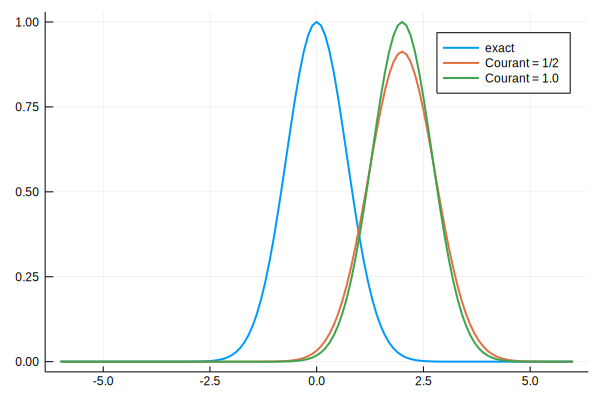

In [19]:
plot(x,hcat(u[:,1],u[:,end],u2[:,end]),label=["exact" "Courant = 1/2" "Courant = 1.0"],lw=2)

The linear convection equation should preserve the initial condition. However, the finite difference method leads to dispersion (i.e. phase shift) as well as damping. Choosing a Courant number of 1 gets rid of the damping but it does not get rid of the phase shift.